## UNDERSTANDING AI MODULE 771763_A24_T1

## PORTFOLIO OF WORK (SUMMATIVE ASSESSMENT)

## NAME: OLAMIDE BANKOLE

## STUDENT ID: 202428313

## COMPONENT TWO

In [38]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
class_names = ['non-emergency', 'emergency']

In [9]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def load_images_and_labels(csv_file, image_folder, has_labels=True):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    # Extract image filenames
    filenames = data['image_names'].values

    if has_labels:
        # Use the numeric labels directly
        labels = data['emergency_or_not'].values
    else:
        labels = None  # No labels for test set

    # Initialize an array to hold the images
    images = []

    # Load and preprocess images
    for filename in filenames:
        img_path = os.path.join(image_folder, filename)
        img = image.load_img(img_path, target_size=(32, 32))
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)

    return np.array(images), labels


# Load training images and labels
train_images, train_labels = load_images_and_labels('/Users/admin/Downloads/Emergency_Vehicles/train.csv', '/Users/admin/Downloads/Emergency_Vehicles/train', has_labels=True)

# Load testing images (no labels)
test_images, test_labels = load_images_and_labels('/Users/admin/Downloads/Emergency_Vehicles/test.csv', '/Users/admin/Downloads/Emergency_Vehicles/test', has_labels=False)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {test_images.shape}")

Train data shape: (1316, 32, 32, 3), Train labels shape: (1316,)
Test data shape: (706, 32, 32, 3)


In [11]:
# Count the number of emergency and non-emergency images
print(f"Number of emergency images: {np.sum(train_labels == 1)}")
print(f"Number of non-emergency images: {np.sum(train_labels == 0)}")

Number of emergency images: 681
Number of non-emergency images: 965


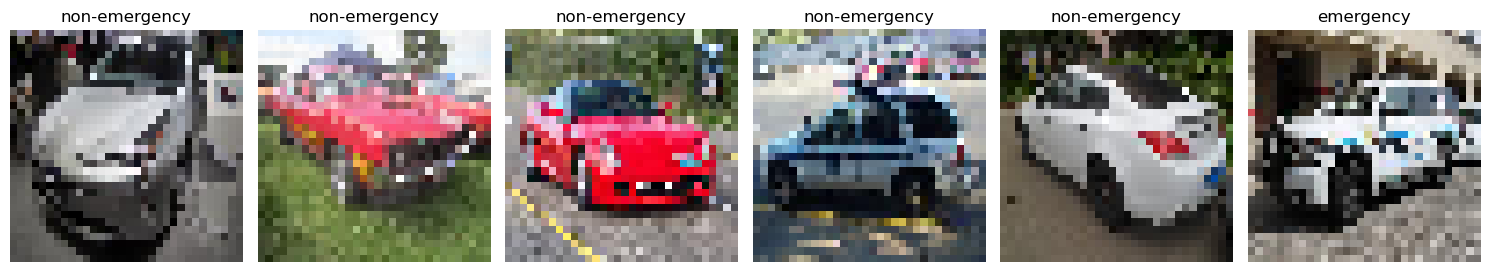

In [13]:
# Visualize first 6 images from the train_images and train_labels arrays
fig, axs = plt.subplots(1, 6, figsize=(15, 3))

# Define the label mapping (binary classification: 0 or 1)
label_map = {0: 'non-emergency', 1: 'emergency'}

for i in range(6):
    # Display the image
    axs[i].imshow(train_images[i])  # Assumes train_images is normalized

    # Get the label
    label = train_labels[i]
    if label not in label_map:
        label_name = "Unknown"  # Handle unexpected label values
    else:
        label_name = label_map[label]  # Convert numeric label to string label
    
    # Set title and remove axis for clarity
    axs[i].set_title(f"{label_name}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

##### Architecture of the CNN Model - Model 1 
- 3 hidden layers
- 32,64,128 neurons for each layer respectively
- relu activation function
- Kernel size 3,3
- MaxPooling Layer
- 50% dropout rate
- Padding = Same
- 1 output layer using sigmoid activation function
- (32, 32, 3) input layer shape
- Fully Connected (Dense) Layer = 512
- optimizer  = SGD(learning rate = 0.01)
- Batch size = 32
- Epochs = 20

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Initialize the CNN model
# Build the model
model = Sequential()

# Input layer specifying the shape of the input images
model.add(Input(shape=(32, 32, 3)))  # Input layer

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Third Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())  # This converts the 3D output to 1D

# Fully connected Dense Layer
model.add(Dense(512, activation='relu'))

# Apply Dropout for regularization
model.add(Dropout(0.5))

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Print the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,417 (1.36 MB)

 Trainable params: 356,417 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.optimizers import SGD
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val),batch_size=32)  

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5772 - loss: 0.6812 - val_accuracy: 0.6000 - val_loss: 0.6693
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5602 - loss: 0.6748 - val_accuracy: 0.6000 - val_loss: 0.6526
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6119 - loss: 0.6689 - val_accuracy: 0.6727 - val_loss: 0.6340
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6727 - loss: 0.6258 - val_accuracy: 0.6364 - val_loss: 0.6103
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6764 - loss: 0.6023 - val_accuracy: 0.7030 - val_loss: 0.5787
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7338 - loss: 0.5457 - val_accuracy: 0.7303 - val_loss: 0.5417
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7673 - loss: 0.5206 - val_accuracy: 0.7485 - val_loss: 0.5253
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7508 - loss: 0.5182 - val_accuracy: 0.7545 - v

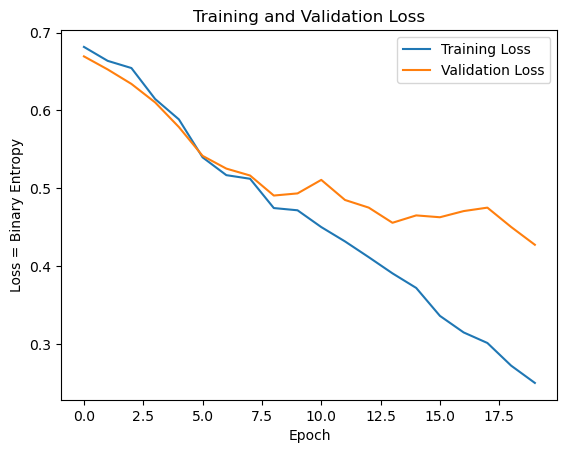

In [20]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Binary Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

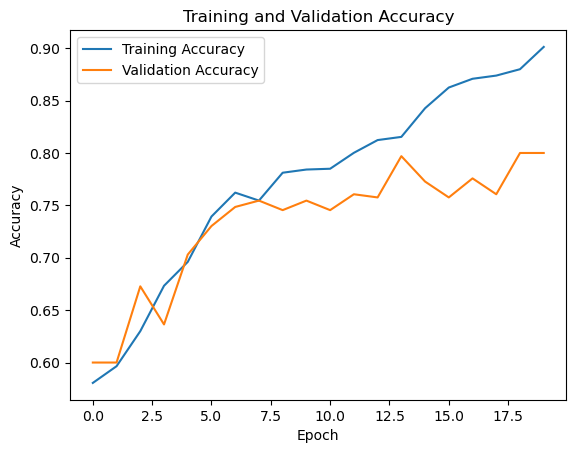

In [22]:
#Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [24]:
y_pred = (model.predict(x_val) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [26]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       198
           1       0.78      0.70      0.74       132

    accuracy                           0.80       330
   macro avg       0.79      0.78      0.79       330
weighted avg       0.80      0.80      0.80       330



<Figure size 2000x3000 with 0 Axes>

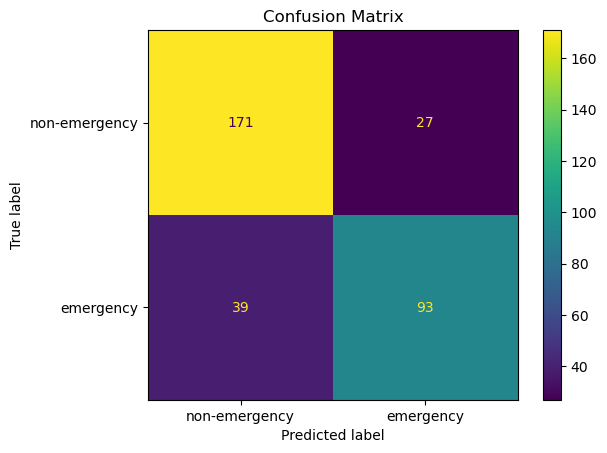

In [28]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

## The model performs well on the non-emergency class (Class 0) but struggles with the emergency class (Class 1), evident from its lower recall of 0.56. This suggests that the model is missing many actual emergency cases (false negatives)

## Hyperparameter Tuning- Using a dropout of 0.3 (30%)

##### Architecture of the CNN Model - Model 2
- 3 hidden layers
- 32,64,128 neurons for each layer respectively
- relu activation function
- Kernel size 3,3
- MaxPooling Layer
- 30% dropout rate
- Padding = Same
- 1 output layer using sigmoid activation function
- (32, 32, 3) input layer shape
- Fully Connected (Dense) Layer = 512
- optimizer  = SGD(learning rate = 0.01)
- Batch size = 32
- Epochs = 20

In [32]:
# Initialize the CNN model
# Build the model
model = Sequential()

# Input layer specifying the shape of the input images
model.add(Input(shape=(32, 32, 3)))  # Input layer

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Third Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())  # This converts the 3D output to 1D

# Fully connected Dense Layer
model.add(Dense(512, activation='relu'))

# Apply Dropout for regularization
model.add(Dropout(0.3))

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Print the summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,417 (1.36 MB)

 Trainable params: 356,417 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val),batch_size=32)  

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5752 - loss: 0.6829 - val_accuracy: 0.6000 - val_loss: 0.6649
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5776 - loss: 0.6731 - val_accuracy: 0.6152 - val_loss: 0.6416
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6340 - loss: 0.6303 - val_accuracy: 0.6182 - val_loss: 0.6379
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6654 - loss: 0.6137 - val_accuracy: 0.6061 - val_loss: 0.6204
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6895 - loss: 0.5930 - val_accuracy: 0.7152 - val_loss: 0.5690
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7391 - loss: 0.5295 - val_accuracy: 0.7303 - val_loss: 0.5444
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7599 - loss: 0.4886 - val_accuracy: 0.7394 - val_loss: 0.5092
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7588 - loss: 0.4879 - val_accuracy: 0.7394 - v

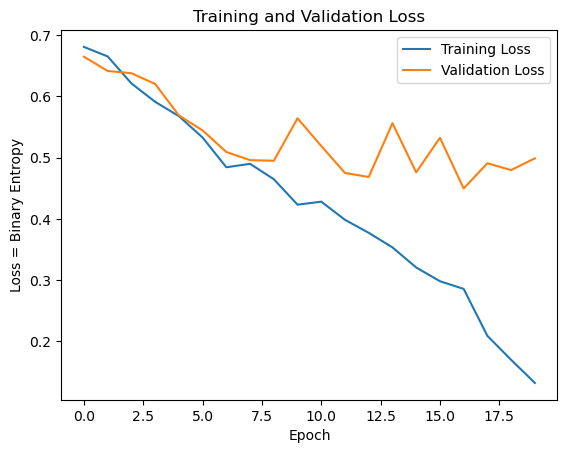

In [36]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Binary Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

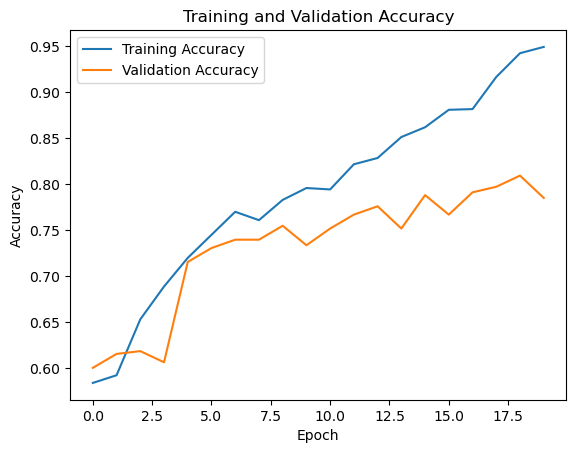

In [38]:
#Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [40]:
y_pred = (model.predict(x_val) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [42]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       198
           1       0.71      0.79      0.75       132

    accuracy                           0.78       330
   macro avg       0.78      0.79      0.78       330
weighted avg       0.79      0.78      0.79       330



## Hyperparameter Tuning- Using a learning rate of 0.001 and 30% dropout 

##### Architecture of the CNN Model - Model 2
- 3 hidden layers
- 32,64,128 neurons for each layer respectively
- relu activation function
- Kernel size 3,3
- MaxPooling Layer
- 30% dropout rate
- Padding = Same
- 1 output layer using sigmoid activation function
- (32, 32, 3) input layer shape
- Fully Connected (Dense) Layer = 512
- optimizer  = SGD(learning rate = 0.01)
- Batch size = 32
- Epochs = 20

In [45]:
model = Sequential()

# Input layer specifying the shape of the input images
model.add(Input(shape=(32, 32, 3)))  # Input layer

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Third Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())  # This converts the 3D output to 1D

# Fully connected Dense Layer
model.add(Dense(512, activation='relu'))

# Apply Dropout for regularization
model.add(Dropout(0.3))

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Print the summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,417 (1.36 MB)

 Trainable params: 356,417 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val),batch_size=32)  

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5782 - loss: 0.6853 - val_accuracy: 0.6000 - val_loss: 0.6743
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5965 - loss: 0.6763 - val_accuracy: 0.6000 - val_loss: 0.6714
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5894 - loss: 0.6725 - val_accuracy: 0.6000 - val_loss: 0.6683
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5753 - loss: 0.6781 - val_accuracy: 0.6000 - val_loss: 0.6651
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5971 - loss: 0.6685 - val_accuracy: 0.6000 - val_loss: 0.6629
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5851 - loss: 0.6674 - val_accuracy: 0.6000 - val_loss: 0.6587
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5990 - loss: 0.6587 - val_accuracy: 0.6091 - val_loss: 0.6544
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6419 - loss: 0.6606 - val_accuracy: 0.6303 - v

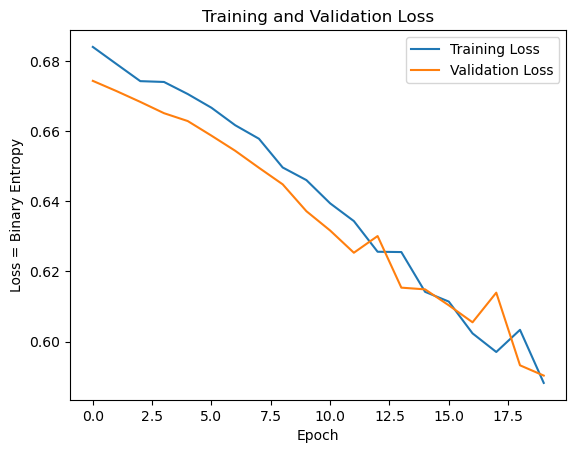

In [49]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Binary Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

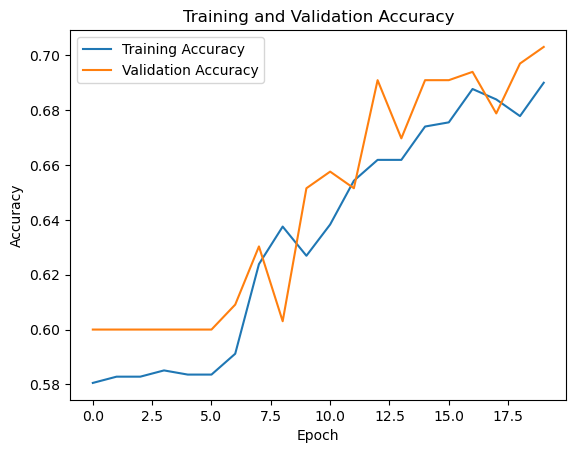

In [51]:
#Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [53]:
y_pred = (model.predict(x_val) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [55]:
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       198
           1       0.68      0.48      0.57       132

    accuracy                           0.70       330
   macro avg       0.70      0.67      0.67       330
weighted avg       0.70      0.70      0.69       330



<Figure size 2000x3000 with 0 Axes>

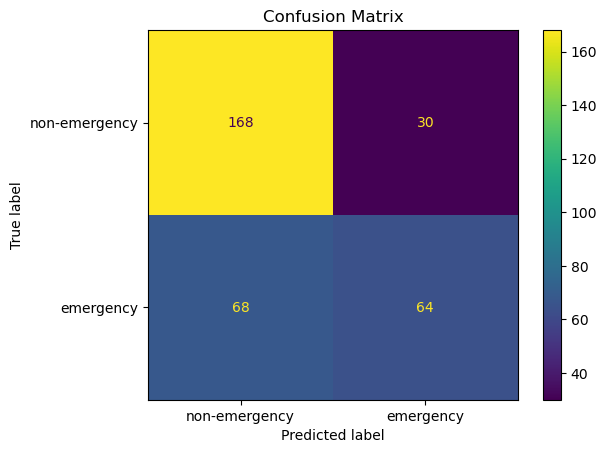

In [57]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter Tuning- Using a batch size of 128 and Fully connected layer to 128


##### Architecture of the CNN Model - Model 3
- 3 hidden layers
- 32,64,128 neurons for each layer respectively
- relu activation function
- Kernel size 3,3
- MaxPooling Layer
- 30% dropout rate
- Padding = Same
- 1 output layer using sigmoid activation function
- (32, 32, 3) input layer shape
- Fully Connected (Dense) Layer = 128
- optimizer  = SGD(learning rate = 0.01)
- Batch size = 128
- Epochs = 20

In [60]:
model = Sequential()

# Input layer specifying the shape of the input images
model.add(Input(shape=(32, 32, 3)))  # Input layer

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Third Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())  # This converts the 3D output to 1D

# Fully connected Dense Layer
model.add(Dense(128, activation='relu'))

# Apply Dropout for regularization
model.add(Dropout(0.3))

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Print the summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,041 (621.25 KB)

 Trainable params: 159,041 (621.25 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val),batch_size=128)  

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.5614 - loss: 0.6858 - val_accuracy: 0.6000 - val_loss: 0.6716
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.5748 - loss: 0.6786 - val_accuracy: 0.6000 - val_loss: 0.6643
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.5767 - loss: 0.6743 - val_accuracy: 0.5970 - val_loss: 0.6580
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.5835 - loss: 0.6648 - val_accuracy: 0.6364 - val_loss: 0.6477
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.6552 - loss: 0.6421 - val_accuracy: 0.6697 - val_loss: 0.6359
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.6704 - loss: 0.6276 - val_accuracy: 0.6727 - val_loss: 0.6295
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.6710 - loss: 0.6224 - val_accuracy: 0.6697 - val_loss: 0.6131
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.6841 - loss: 0.6009 - val_accuracy: 0.

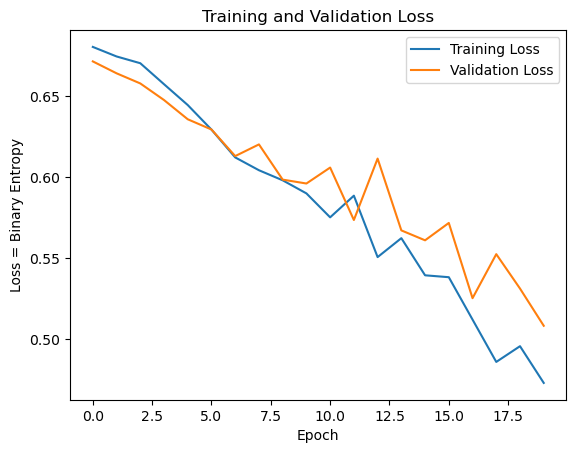

In [65]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Binary Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

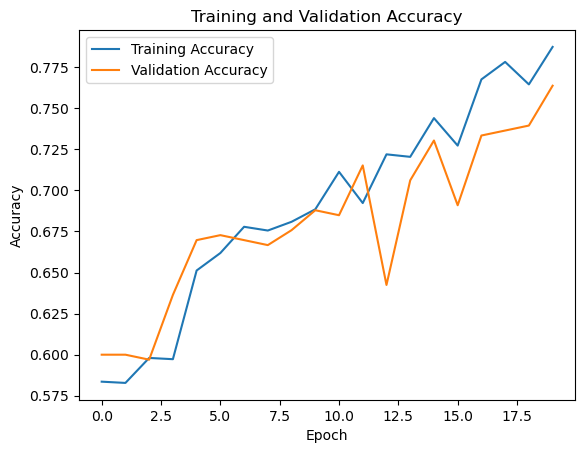

In [67]:
#Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [69]:
y_pred = (model.predict(x_val) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [71]:
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       198
           1       0.69      0.73      0.71       132

    accuracy                           0.76       330
   macro avg       0.75      0.76      0.76       330
weighted avg       0.77      0.76      0.76       330



<Figure size 2000x3000 with 0 Axes>

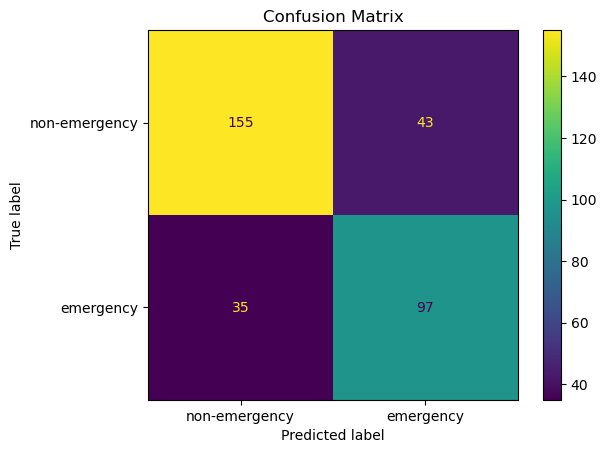

In [73]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter tuning - Using Kernel size - 5,5 

##### Architecture of the CNN Model - Model 4
- 3 hidden layers
- 32,64,128 neurons for each layer respectively
- relu activation function
- Kernel size 5,5
- MaxPooling Layer
- 30% dropout rate
- Padding = Same
- 1 output layer using sigmoid activation function
- (32, 32, 3) input layer shape
- Fully Connected (Dense) Layer = 128
- optimizer  = SGD(learning rate = 0.01)
- Batch size = 128
- Epochs = 20

In [75]:
model = Sequential()

# Input layer specifying the shape of the input images
model.add(Input(shape=(32, 32, 3)))  # Input layer

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))

# Third Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())  # This converts the 3D output to 1D

# Fully connected Dense Layer
model.add(Dense(128, activation='relu'))

# Apply Dropout for regularization
model.add(Dropout(0.3))

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Print the summary of the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 2, 2, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,265 (1.05 MB)

 Trainable params: 275,265 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val),batch_size=128) 

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.5275 - loss: 0.6893 - val_accuracy: 0.6000 - val_loss: 0.6721
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.5954 - loss: 0.6698 - val_accuracy: 0.6000 - val_loss: 0.6715
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.5968 - loss: 0.6685 - val_accuracy: 0.6000 - val_loss: 0.6606
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.6083 - loss: 0.6691 - val_accuracy: 0.6000 - val_loss: 0.6571
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.6162 - loss: 0.6511 - val_accuracy: 0.6455 - val_loss: 0.6393
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.6317 - loss: 0.6376 - val_accuracy: 0.6515 - val_loss: 0.6274
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.6742 - loss: 0.6241 - val_accuracy: 0.6606 - val_loss: 0.6157
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.6747 - loss: 0.5985 - val_accuracy: 0.

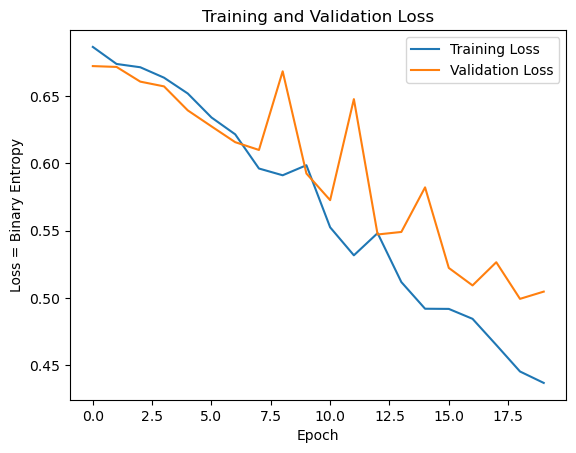

In [79]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Binary Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

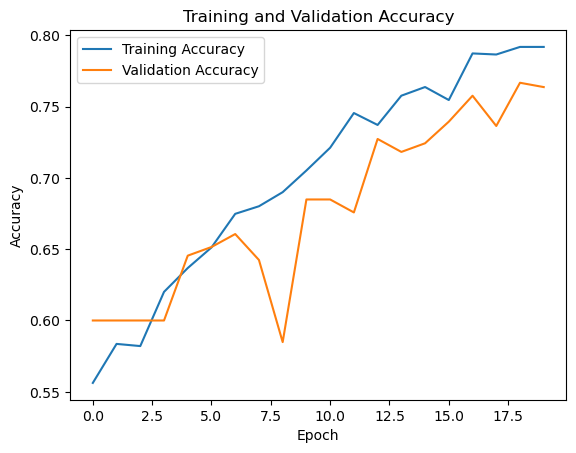

In [81]:
#Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [83]:
y_pred = (model.predict(x_val) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [85]:
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       198
           1       0.75      0.62      0.68       132

    accuracy                           0.76       330
   macro avg       0.76      0.74      0.75       330
weighted avg       0.76      0.76      0.76       330



<Figure size 2000x3000 with 0 Axes>

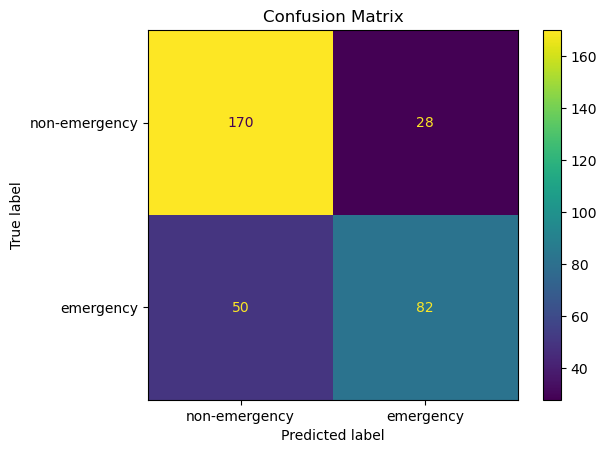

In [87]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter tuning - Using AveragePooling2D instead of MaxPooling 2D

##### Architecture of the CNN Model - Model 5
- 3 hidden layers
- 32,64,128 neurons for each layer respectively
- relu activation function
- Kernel size 3,3
- AveragePooling Layer
- 30% dropout rate
- Padding = Same
- 1 output layer using sigmoid activation function
- (32, 32, 3) input layer shape
- Fully Connected (Dense) Layer = 128
- optimizer  = SGD(learning rate = 0.01)
- Batch size = 128
- Epochs = 20

In [90]:
from tensorflow.keras.layers import AveragePooling2D

model = Sequential()

# Input layer specifying the shape of the input images
model.add(Input(shape=(32, 32, 3)))  # Input layer

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

# First Max Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Second Max Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Third Max Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())  # This converts the 3D output to 1D

# Fully connected Dense Layer
model.add(Dense(128, activation='relu'))

# Apply Dropout for regularization
model.add(Dropout(0.3))

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Print the summary of the model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 7, 7, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 2, 2, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,041 (621.25 KB)

 Trainable params: 159,041 (621.25 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val),batch_size=128) 

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.4852 - loss: 0.6939 - val_accuracy: 0.6000 - val_loss: 0.6781
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.5674 - loss: 0.6823 - val_accuracy: 0.6000 - val_loss: 0.6700
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.5873 - loss: 0.6712 - val_accuracy: 0.6000 - val_loss: 0.6638
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.5930 - loss: 0.6636 - val_accuracy: 0.6000 - val_loss: 0.6597
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.5969 - loss: 0.6613 - val_accuracy: 0.6000 - val_loss: 0.6538
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.5821 - loss: 0.6627 - val_accuracy: 0.6152 - val_loss: 0.6470
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.5838 - loss: 0.6596 - val_accuracy: 0.6636 - val_loss: 0.6395
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.6282 - loss: 0.6409 - val_accuracy: 0.

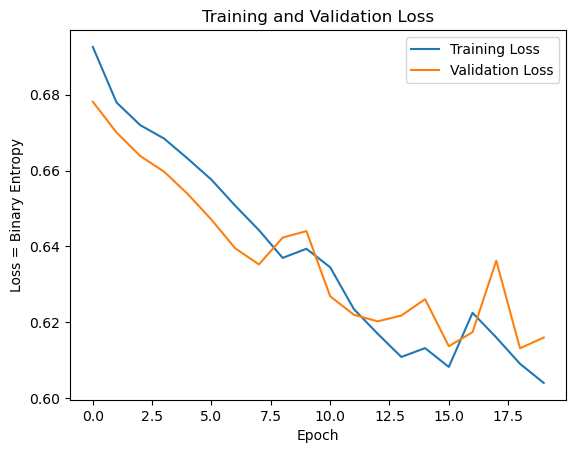

In [94]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Binary Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

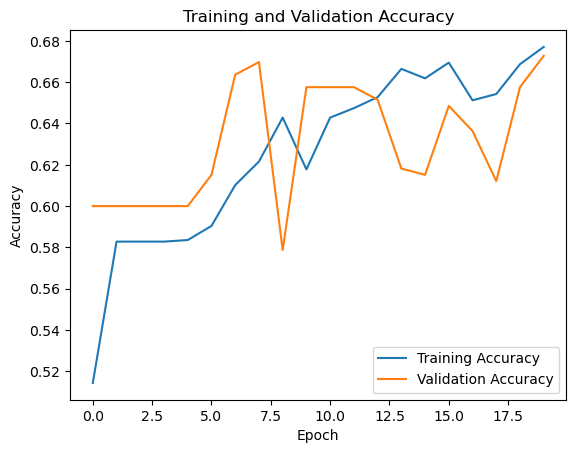

In [96]:
#Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [98]:
y_pred = (model.predict(x_val) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [100]:
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       198
           1       0.64      0.41      0.50       132

    accuracy                           0.67       330
   macro avg       0.66      0.63      0.63       330
weighted avg       0.67      0.67      0.65       330



<Figure size 2000x3000 with 0 Axes>

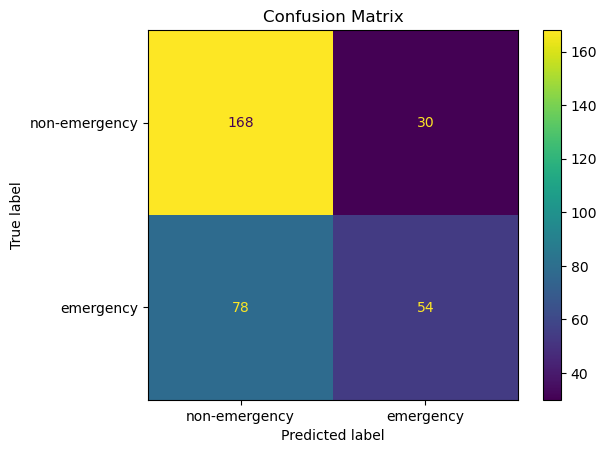

In [102]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter Tunng - Using BatchNormalization

##### Architecture of the CNN Model - Model 6
- 3 hidden layers
- 32,64,128 neurons for each layer respectively
- relu activation function
- Kernel size 3,3
- BatchNormalization
- MaxPooling Layer
- 30% dropout rate
- Padding = Same
- 1 output layer using sigmoid activation function
- (32, 32, 3) input layer shape
- optimizer  = SGD(learning rate = 0.01)
- Fully Connected (Dense) Layer = 128
- Batch size = 128
- Epochs = 20

In [105]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

# Input layer specifying the shape of the input images
model.add(Input(shape=(32, 32, 3)))  # Input layer

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization(momentum = 0.9)) 

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization(momentum = 0.9))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Third Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization(momentum = 0.9))

# Flatten the output for the fully connected layers
model.add(Flatten())  # This converts the 3D output to 1D

# Fully connected Dense Layer
model.add(Dense(128, activation='relu'))

# Apply Dropout for regularization
model.add(Dropout(0.3))

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Print the summary of the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,937 (624.75 KB)

 Trainable params: 159,489 (623.00 KB)

 Non-trainable params: 448 (1.75 KB)

In [107]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val),batch_size=128) 

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.5990 - loss: 0.7684 - val_accuracy: 0.6000 - val_loss: 0.7524
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.8008 - loss: 0.4424 - val_accuracy: 0.6545 - val_loss: 0.6208
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8622 - loss: 0.3444 - val_accuracy: 0.7091 - val_loss: 0.5587
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.8933 - loss: 0.2704 - val_accuracy: 0.7606 - val_loss: 0.4811
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.9205 - loss: 0.2084 - val_accuracy: 0.7333 - val_loss: 0.6175
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.9426 - loss: 0.1563 - val_accuracy: 0.8152 - val_loss: 0.4248
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9713 - loss: 0.1058 - val_accuracy: 0.7636 - val_loss: 0.5658
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.9728 - loss: 0.0935 - val_accuracy: 0.

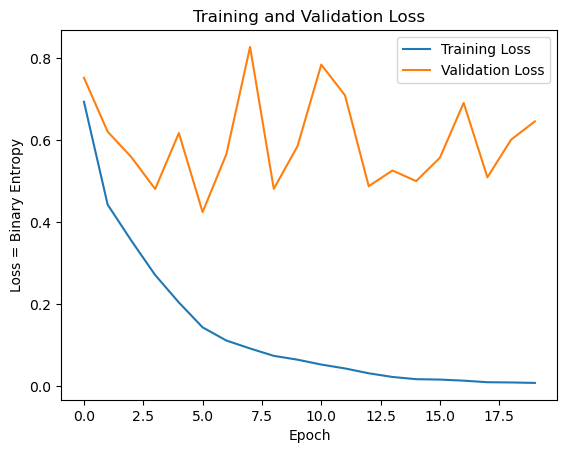

In [110]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Binary Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

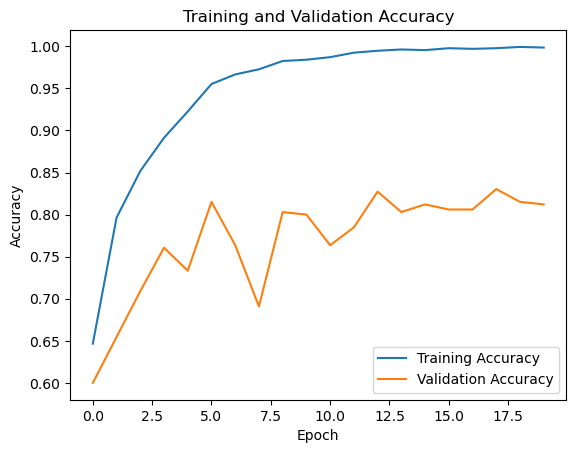

In [112]:
#Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [114]:
y_pred = (model.predict(x_val) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [116]:
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       198
           1       0.86      0.64      0.73       132

    accuracy                           0.81       330
   macro avg       0.83      0.78      0.79       330
weighted avg       0.82      0.81      0.81       330



<Figure size 2000x3000 with 0 Axes>

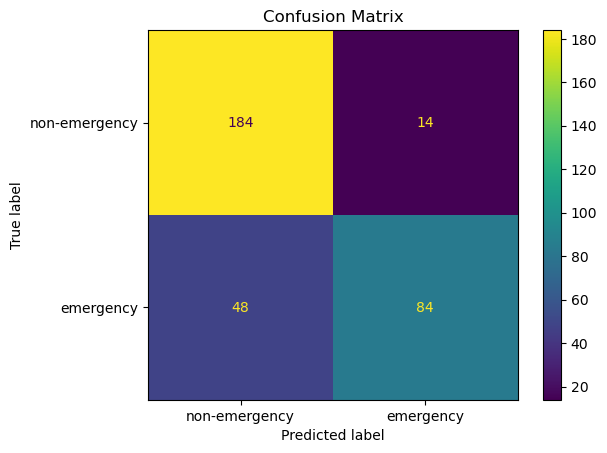

In [118]:
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter Tunng - Using Dense layer 64

##### Architecture of the CNN Model - Model 7
- 3 hidden layers
- 32,64,128 neurons for each layer respectively
- relu activation function
- Kernel size 3,3
- BatchNormalization
- MaxPooling Layer
- 30% dropout rate
- Padding = Same
- 1 output layer using sigmoid activation function
- (32, 32, 3) input layer shape
- optimizer  = SGD(learning rate = 0.01)
- Fully Connected (Dense) Layer = 64
- Batch size = 128
- Epochs = 20

In [120]:
model = Sequential()

# Input layer specifying the shape of the input images
model.add(Input(shape=(32, 32, 3)))  # Input layer

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization(momentum = 0.9)) 

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization(momentum = 0.9))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Third Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization(momentum = 0.9))

# Flatten the output for the fully connected layers
model.add(Flatten())  # This converts the 3D output to 1D

# Fully connected Dense Layer
model.add(Dense(64, activation='relu'))

# Apply Dropout for regularization
model.add(Dropout(0.3))

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Print the summary of the model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,041 (496.25 KB)

 Trainable params: 126,593 (494.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [122]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val),batch_size=128) 

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.6006 - loss: 0.7849 - val_accuracy: 0.6000 - val_loss: 0.6627
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.7633 - loss: 0.4949 - val_accuracy: 0.7242 - val_loss: 0.5788
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.8311 - loss: 0.3856 - val_accuracy: 0.7121 - val_loss: 0.5772
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.8870 - loss: 0.3006 - val_accuracy: 0.7636 - val_loss: 0.4797
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.9156 - loss: 0.2206 - val_accuracy: 0.7697 - val_loss: 0.5705
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.9500 - loss: 0.1643 - val_accuracy: 0.7848 - val_loss: 0.5035
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9661 - loss: 0.1293 - val_accuracy: 0.8061 - val_loss: 0.5124
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9825 - loss: 0.0840 - val_accuracy: 0.

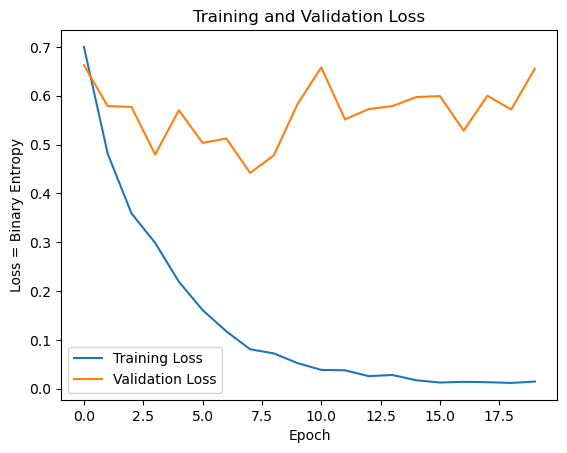

In [124]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Binary Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

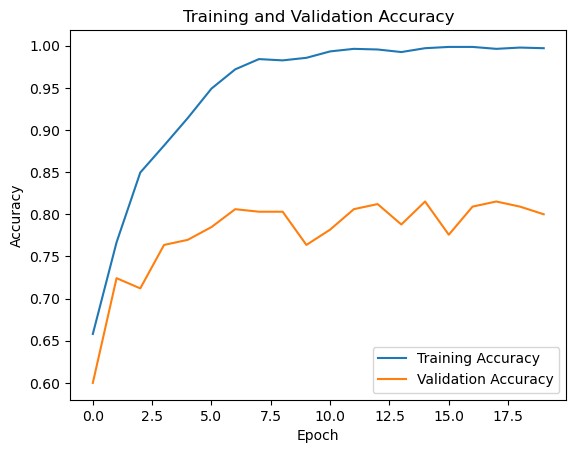

In [126]:
#Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [128]:
y_pred = (model.predict(x_val) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [130]:
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       198
           1       0.70      0.89      0.78       132

    accuracy                           0.80       330
   macro avg       0.80      0.81      0.80       330
weighted avg       0.82      0.80      0.80       330



<Figure size 2000x3000 with 0 Axes>

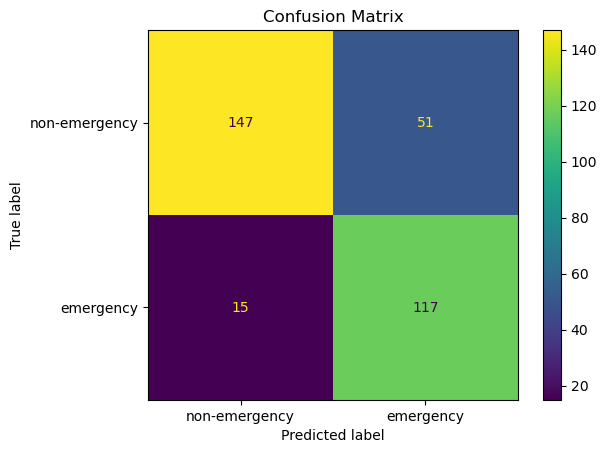

In [132]:
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()